<a href="https://colab.research.google.com/github/fgassuncao/MO412/blob/main/assignment_6/assignment_6_iynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fábio Gomes de Assunção 233664
### Assignment 6 - Scale Free Network
##### (Obs.: The plots are separeted by sections)
##### [Obs.2: Conclusions about net1.tsv (asssigned as G1) and net2.tsv (assigned as G2) are denoted in the end]

## Imports

In [1]:
import numpy as np
import networkx as nx #imports networkX stuff
import pandas as pd
import collections
import matplotlib.pyplot as plt # Lib to plot the graphs

## Reading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/data_MO412/6/"

In [4]:
df_links1 = pd.read_csv(f"{path}net1.tsv",header=None,sep="\t")

In [5]:
df_links1

,0,1
0,1,3
1,1,15
2,1,99
3,1,111
4,3,12
...,...,...
1444,991,993
1445,994,995
1446,996,997
1447,998,999


In [6]:
df_links2 = pd.read_csv(f"{path}net2.tsv",header=None,sep=" ")

In [7]:
df_links2

,0,1
0,1,78
1,1,724
2,1,743
3,1,886
4,2,211
...,...,...
1490,942,987
1491,949,970
1492,961,968
1493,966,989


## Building the Networks

In [8]:
G1=nx.from_pandas_edgelist(df_links1, 0, 1, create_using=nx.Graph)

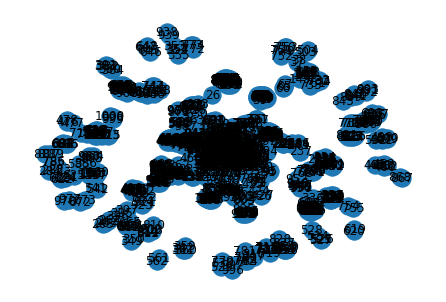

In [9]:
nx.draw(G1,with_labels=True)

In [10]:
G2=nx.from_pandas_edgelist(df_links2, 0, 1, create_using=nx.Graph)

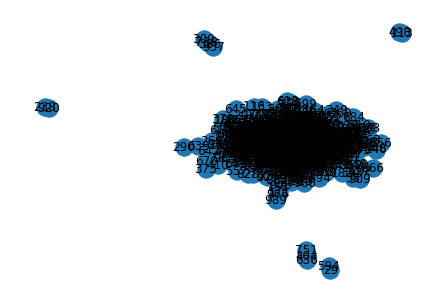

In [11]:
nx.draw(G2,with_labels=True)

## Coding

In [12]:
def log(n):
    return np.log(n)

In [13]:
def scaleFree(G):
  degs = [G.degree(n) for n in G.nodes()] # Find the degree of nodes
  dict_deg_distribution = collections.Counter(degs) # Count how many times each degree apears

  list_uniq_degrees = np.unique(degs) # List with unique degree

  # PREPARING LOG LOG 
  list_prob_degree = [] # List with probability of each degree

  for deg_dist in dict_deg_distribution: # Loop to get the degree distributionm
    list_prob_degree.append(dict_deg_distribution[deg_dist]/len(degs))
  
  #PREPARING CUMULATIVE PLOT
  dict_cumulative_degree = {} # Dict with how many nodes are degree equal or bigest that
  # data_sample = np.arange(1, max(degs)+1)

  for deg in list_uniq_degrees:
    dict_cumulative_degree[deg] = np.count_nonzero(deg <= degs)
    
  list_cumulative_prob = list(map(lambda x: (x[1]/len(degs)), dict_cumulative_degree.items()))

  return dict_deg_distribution, list_prob_degree, list_uniq_degrees, list_cumulative_prob

## Ploting

In [14]:
def plotScaleFree(G):
    dict_deg_distribution, list_prob_degree, list_uniq_degrees, list_cumulative_prob = scaleFree(G)

    # Plotting the degree distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

    #Plot Binning
    ax1.scatter((list(dict_deg_distribution.keys())),
                (list_prob_degree))

    ax1.set_yscale("log")
    ax1.set_xscale("log")
    ax1.set_xlabel('log k')
    ax1.set_ylabel('log Pk')
    ax1.set_title('Binning')

    # Plot Cumulative
    ax2.scatter(list_uniq_degrees, list_cumulative_prob)

    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax2.set_title('Cumulative')
    ax2.set_xlabel('log k')
    ax2.set_ylabel('log Pk')

### Ploting G1

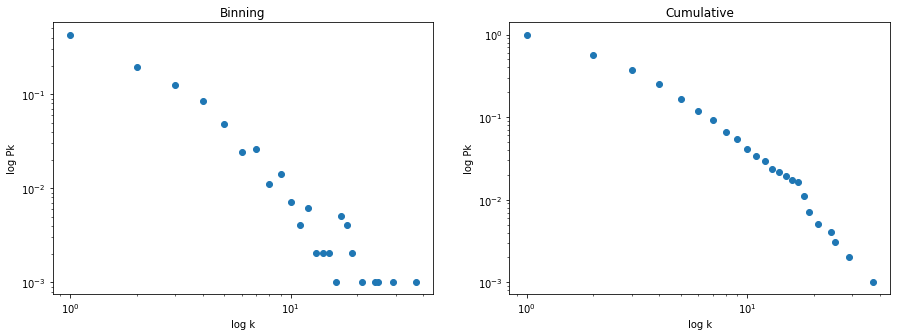

In [15]:
plotScaleFree(G1)

### Ploting G2

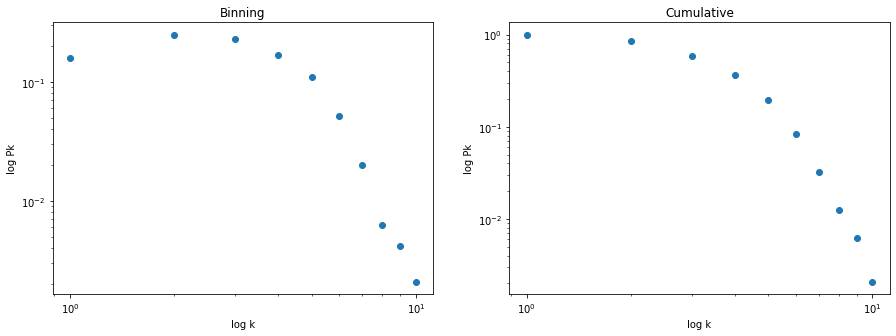

In [16]:
plotScaleFree(G2)

## Assessing about Scale-free properties

In [17]:
def plotRandom(G, tittle):
  dict_deg_distribution, list_prob_degree, list_uniq_degrees, list_cumulative_prob = scaleFree(G)
  G_random = nx.gnm_random_graph(G.number_of_nodes() ,G.number_of_edges())

  degs_random = [G_random.degree(n) for n in G_random.nodes()] # Find the degree of nodes
  dict_random_deg_distribution = collections.Counter(degs_random) # Count how many times each degree apears

  list_random_prob_degree = [] # List with probability of each degree

  for deg_random_dist in dict_random_deg_distribution: # Loop to get the degree distributionm
    list_random_prob_degree.append(dict_random_deg_distribution[deg_random_dist]/len(degs_random))
  
  # Find the max degree in the network
  random_max_degree = max(sorted([d for n, d in G_random.degree()], reverse=True))

  # Plotting the degree distribution
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

  fig.suptitle(f'Log log plot of the random and scale-free networks of graph {tittle}', size=15)

  #Plot Random Network
  ax1.scatter((list(dict_random_deg_distribution.keys())),
              (list_random_prob_degree))

  ax1.set_xlabel("Degree K")
  ax1.set_ylabel('Pk')
  ax1.set_title('(a) Random Network')
  ax1.set_yscale("log")
  ax1.set_xscale("log")

  # Plot Scale-Free
  ax2.scatter((list(dict_deg_distribution.keys())),
              (list_prob_degree))

  ax2.set_title('(b) Scale-Free')
  ax2.set_xlabel("Degree K")
  ax2.set_ylabel('Pk')
  ax2.set_yscale("log")
  ax2.set_xscale("log")
    

## Assesstment of G1 and G2

### Ploting Random network using information from G1 

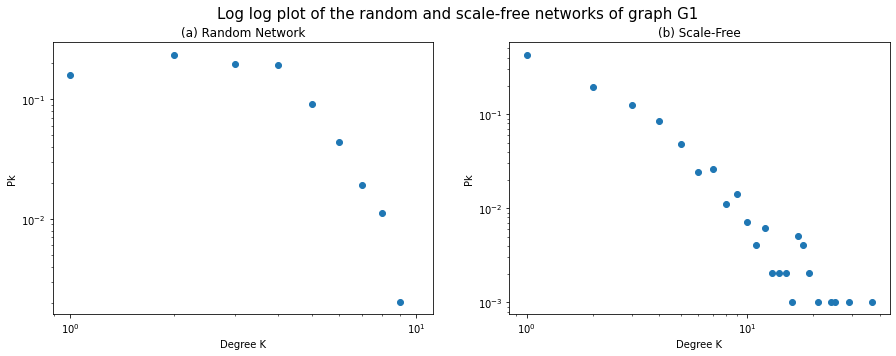

In [18]:
plotRandom(G1, "G1")

### Ploting Random network using information from G2

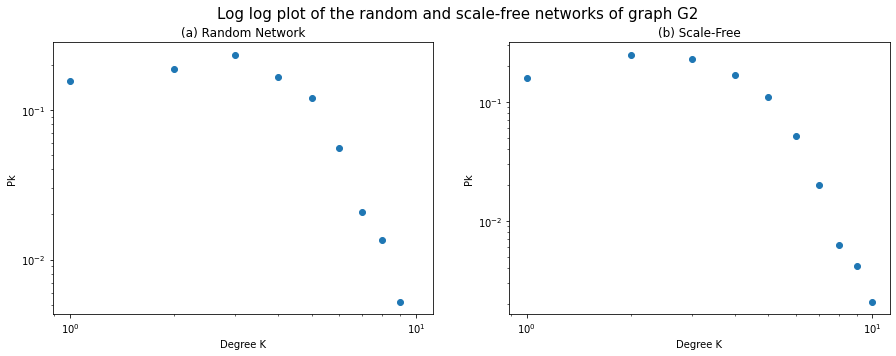

In [19]:
plotRandom(G2, "G2")

## Explaning why G1 a Scale-free network and G2 is not

### The image bellow is from $\href{http://networksciencebook.com/}{Barabási's Book}$. 

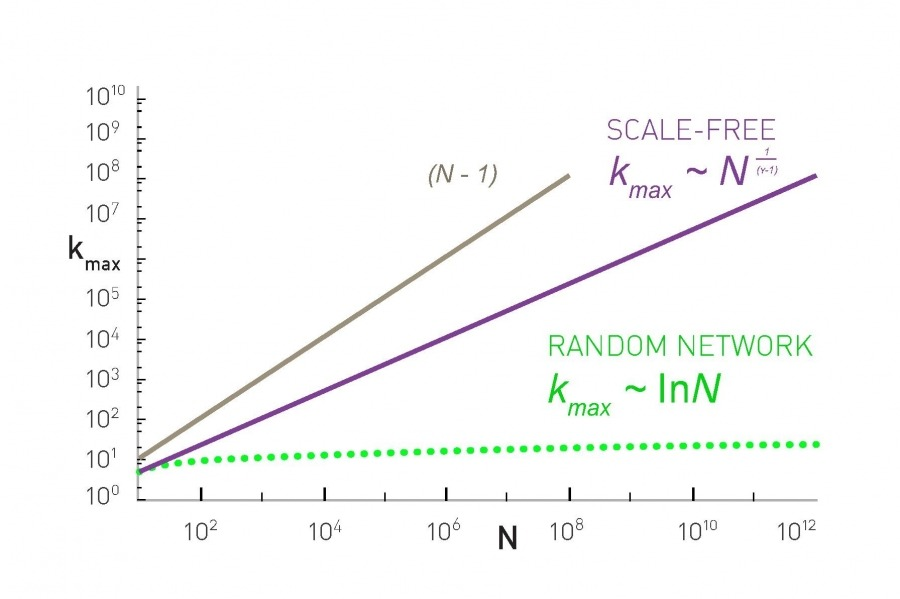

#### From it, we can see that for random networks,  $k_{max} ≈ lnN$, and for scale-free networks $k_{max} \approx N^{\frac{1}{\gamma - 1}}$, respectively.

### Regarding the information (number of nodes and number of links) of G1 (net1.tsv), we can see that a random network built using such information has $k_{max}$ close to $10^{-1}$, Figure (a) in Assesstment of G1. 

###Figure (b) in Assesstment of G1, represents the degree distribution of G1, and we can see that a higher amount of hubs overcoming the $k_{max}$ of the random network. So, we can conclude that G1 is a scale-free network due to the ovecoming $k_{max}$ Also, we can see that the distribution behaviors like a power law distribution.

### Regarding the information (number of nodes and number of links) of G2 (net2.tsv), the distribution seems like a random network in the Figures (a) and (b) in Assesstment of G2 (not like a power law distribution).

###The conclusios are based in definitions obtained in $\href{http://networksciencebook.com/chapter/4#power-laws}{Barabási's Book}$, as highlihghted bellow 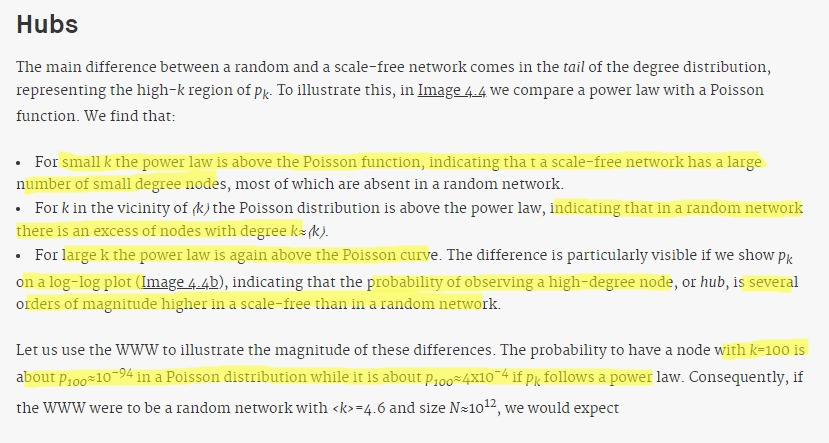